# This example shows how to setup a TW accelerating structure from a 1D field map

In [21]:
%plot -f SVG

In [22]:
RF_Track;

## Load the field map from disk

In [23]:
T = load('data/TWS_Sband.dat');

## Prepares for the RF-Track element
* $E_z$ is the on-axis electric field, in complex form, on a regular 1D mesh
* $h_z$ is the mesh step

In [24]:
Ez = T(:,2) + 1j * T(:,3); % V/m
hz = T(2,1) - T(1,1); % m

Let's have a look at the field

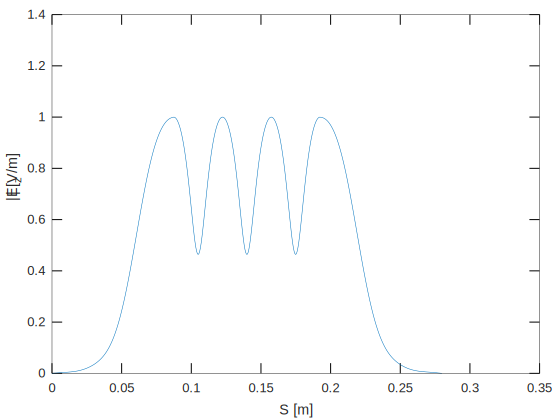

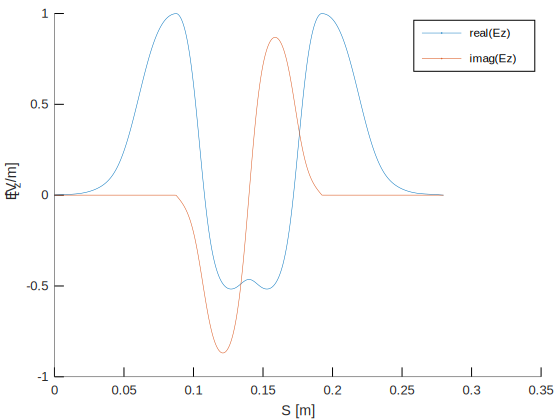

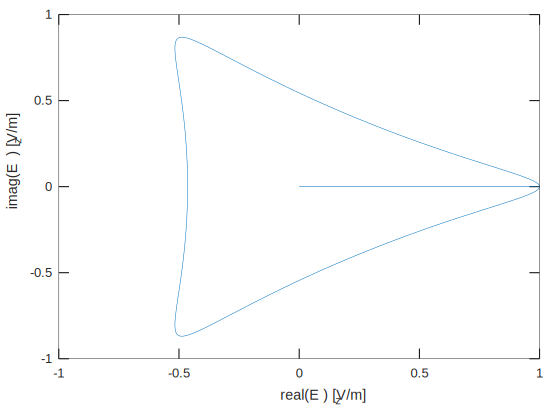

In [25]:
figure
plot(T(:,1), abs(Ez));
xlabel('S [m]');
ylabel('|E_z| [V/m]');

figure
hold on
plot(T(:,1), real(Ez));
plot(T(:,1), imag(Ez));
legend('real(Ez)', 'imag(Ez)');
xlabel('S [m]');
ylabel('E_z [V/m]');

figure
plot(real(Ez), imag(Ez))
xlabel('real(E_z) [V/m]');
ylabel('imag(E_z) [V/m]');

## Create a new element

Now we create a new element to be used for tracking

In [26]:
phid = 0; % degrees
freq = 2.856e9; % Hz

scaling = 1e6;

RF = RF_FieldMap_1d (Ez * scaling, hz, -1, freq, +1);
RF.set_phid(phid);
RF.set_odeint_algorithm('rk2'); % integration algorithm
RF.set_nsteps(1000); % number of integration steps
RF.set_tt_nsteps(100); % transport table

In [27]:
RF.get_length()

ans = 0.2798


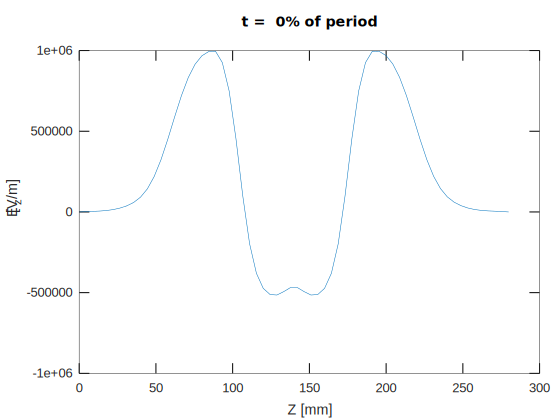

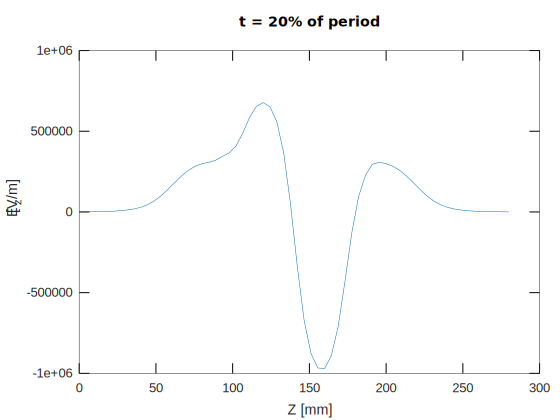

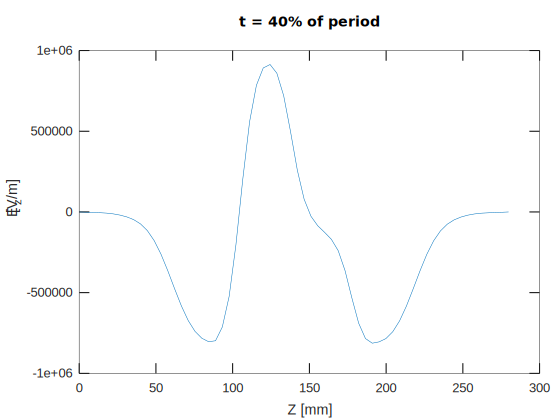

In [28]:
RF.set_t0(0.0);

T_period = RF.get_period(); % mm/c

Z = linspace(0, RF.get_length()*1e3, 64); % mm
O = zeros(size(Z));
I = ones(size(Z));

for t = [ 0.0 0.2 0.4 ]*T_period

    % read the field
    [E,B] = RF.get_field(O, O, Z, t*I);
    
    figure;
    plot(Z, E(:,3)/1e6);
    title(sprintf('t = %2.f%% of period', t*100/T_period));
    xlabel('Z [mm]');
    ylabel('E_z [MV/m]');
    
end

In [29]:
RF.get_field(0, 0, 150, 0.6)

ans =

            0
            0
  -5.3704e+05

ans =

   0
   0
   0



## Introducing "autophase"
First, let's define a reference particle

In [30]:
P0 = Bunch6d (RF_Track.electronmass, 0.0, -1, [ 0 0 0 0 0 100 ]);

In [35]:
L = Lattice();
L.append(RF);
L.unset_t0();

Autophase sets the reference time $t_0$ of each RF element such that $\phi_\text{RF}=0$ corresponds to on-crest acceleration

In [36]:
P_max = L.autophase (P0)

P_max = 100.10


In [38]:
P1 = L.track (P0);
P1.get_phase_space()

ans =

          0          0          0          0   279.8334   100.1029

